### PREGUNTA 3

La duración de la gestación humana se aproxima bien mediante una distribución normal con una media µ = 280 días y una desviación estándar σ = 8,5 días.

#### 1.  Realice graficas correspondiente a la función de densidad de probabilidad (pdf) y a la función de distribución acumulativa (cdf).

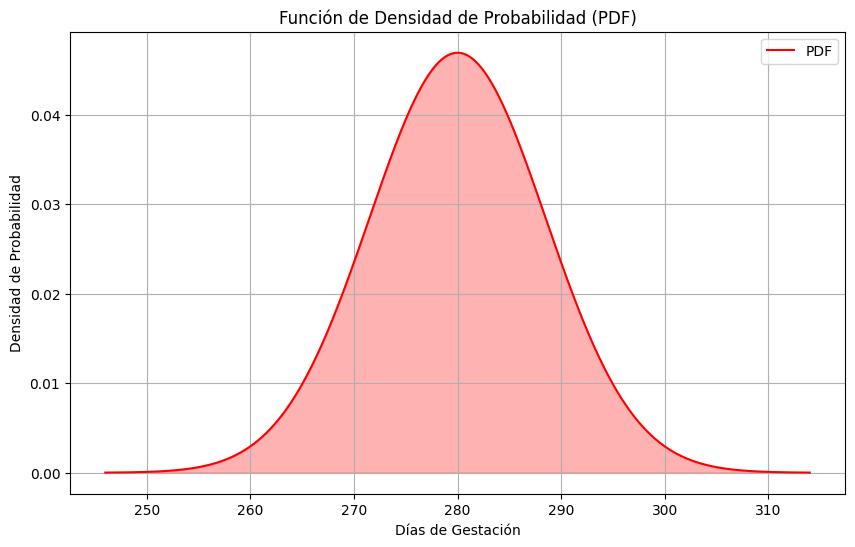

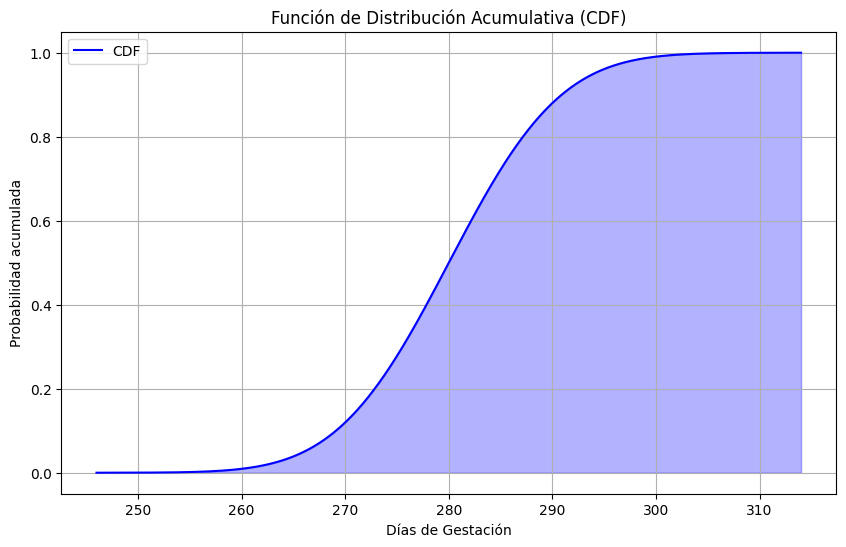

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def generar_distribucion_normal(mu, sigma):
    """
    Genera una distribución normal.

    Parámetros:
    mu (float): Media de la distribución.
    sigma (float): Desviación estándar de la distribución.

    Retorna:
    x (array): Valores del rango.
    pdf (array): Función de densidad de probabilidad.
    cdf (array): Función de distribución acumulativa.
    """
    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
    pdf = norm.pdf(x, mu, sigma)
    cdf = norm.cdf(x, mu, sigma)
    return x, pdf, cdf

def graficar_funcion(x, y, titulo, xlabel, ylabel, label, colorElegido):
    """
    Grafica una función.

    Parámetros:
    x (array): Valores en el eje x.
    y (array): Valores en el eje y.
    titulo (str): Título del gráfico.
    xlabel (str): Etiqueta del eje x.
    ylabel (str): Etiqueta del eje y.
    label (str): Etiqueta de la función.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label=label, color=colorElegido)  # Color azul para las funciones
    plt.fill_between(x, y, color=colorElegido, alpha=0.3)
    plt.title(titulo)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.legend()
    plt.show()

# Parámetros de la distribución normal
mu = 280  # Media
sigma = 8.5  # Desviación estándar

# Generar distribución normal
x, pdf, cdf = generar_distribucion_normal(mu, sigma)

# Graficar la función de densidad de probabilidad (PDF)
graficar_funcion(x, pdf, 'Función de Densidad de Probabilidad (PDF)', 'Días de Gestación', 'Densidad de Probabilidad', 'PDF', 'red')

# Graficar la función de distribución acumulativa (CDF)
graficar_funcion(x, cdf, 'Función de Distribución Acumulativa (CDF)', 'Días de Gestación', 'Probabilidad acumulada', 'CDF', 'blue')


------

### Corregir

#### 2.  Supongamos que tienes un examen final que está programado para el 19 de abril y tu profesora embarazada tiene una fecha de parto prevista para el 24 de abril. Encuentre la probabilidad de que dé a luz el mismo día del examen final o antes.

La probabilidad de que la profesora dé a luz el mismo día del examen final o antes es: 0.00%


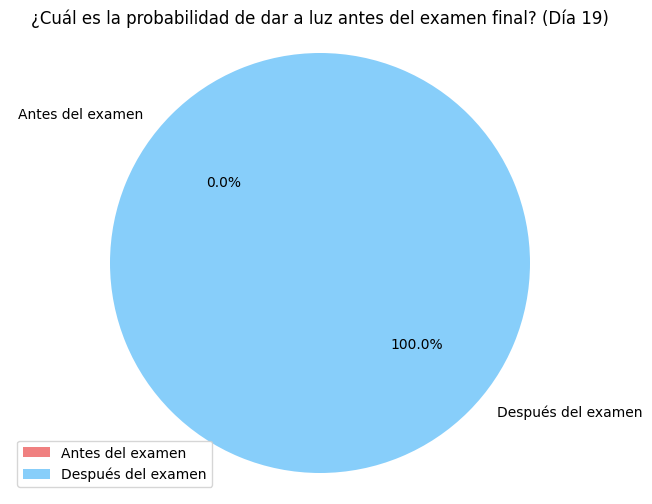

In [24]:
from scipy.stats import norm
import matplotlib.pyplot as plt

def probabilidad_parto_antes_examen(mu: float, sigma: float, fecha_examen: int) -> float:
    """
    Calcula la probabilidad de que la profesora dé a luz el mismo día del examen final o antes.

    Args:
        mu (float): Media de la distribución normal.
        sigma (float): Desviación estándar de la distribución normal.
        fecha_examen (int): Día del examen final.

    Returns:
        float: Probabilidad de parto antes del examen final en forma de porcentaje.
    """
    # Calcular la probabilidad acumulada hasta la fecha del examen
    probabilidad = norm.cdf(fecha_examen, mu, sigma)

    # Convertir la probabilidad a porcentaje con dos decimales de precisión
    probabilidad_porcentaje = probabilidad * 100

    return probabilidad_porcentaje

def graficar_probabilidad(probabilidad: float, fecha_examen: int):
    """
    Genera una gráfica de torta que muestra la probabilidad de parto antes del examen final.

    Args:
        probabilidad (float): Probabilidad de parto antes del examen final en forma de porcentaje.
        fecha_examen (int): Día del examen final.
    """
    # Calcular el porcentaje restante para representar la probabilidad de no dar a luz antes del examen
    probabilidad_no_parto = 100 - probabilidad

    # Etiquetas para la gráfica
    etiquetas = ['Antes del examen', 'Después del examen']
    
    # Datos para la gráfica
    valores = [probabilidad, probabilidad_no_parto]

    # Crear la gráfica de torta
    plt.figure(figsize=(8, 6))
    colores = ['lightcoral', 'lightskyblue']
    plt.pie(valores, labels=etiquetas, colors=colores, autopct='%1.1f%%', startangle=140)
    plt.legend(loc="lower left", labels=etiquetas)# Agregar una leyenda que muestre qué color corresponde a cada categoría
    plt.title('¿Cuál es la probabilidad de dar a luz antes del examen final? (Día {})'.format(fecha_examen))
    plt.axis('equal')
    plt.show()

# Parámetros de la distribución normal
mu = 280  # Media
sigma = 8.5  # Desviación estándar
fecha_examen = 19  # Día del examen final

# Calcular la probabilidad de parto antes del examen final
probabilidad = probabilidad_parto_antes_examen(mu, sigma, fecha_examen)

# Imprimir el resultado de la probabilidad en porcentaje y la explicación
print("La probabilidad de que la profesora dé a luz el mismo día del examen final o antes es: {:.2f}%".format(probabilidad))

# Generar la gráfica de torta
graficar_probabilidad(probabilidad, fecha_examen)


#### 3.  Encuentre la probabilidad de que dé a luz en abril después del examen.

In [19]:
from scipy.stats import norm

# Parámetros de la distribución normal
mu = 280  # Media
sigma = 8.5  # Desviación estándar

# Calcular la probabilidad acumulada hasta el 19 de abril
probabilidad_hasta_19_abril = norm.cdf(19, mu, sigma)

# Calcular la probabilidad de dar a luz después del 19 de abril (después del examen)
# La probabilidad de dar a luz después del 19 de abril es igual a 1 menos la probabilidad de dar a luz el mismo día del examen o antes
probabilidad_despues_examen = (1 - probabilidad_hasta_19_abril) * 100  # Convertir a porcentaje

# Explicar el cálculo de la probabilidad después del examen en términos simples
explicacion = "Para calcular la probabilidad de que la profesora dé a luz después del examen final, restamos la probabilidad acumulada hasta el 19 de abril de 1. \nEsto se debe a que la función de distribución acumulativa (CDF) nos da la probabilidad acumulada hasta cierto punto, por lo que para encontrar la probabilidad después del 19 de abril, \nrestamos esa probabilidad acumulada de 1, que representa la probabilidad total. \nEsto nos da la probabilidad de dar a luz después del 19 de abril."

# Imprimir el resultado y la explicación
print(f"La probabilidad de que la profesora dé a luz en abril después del examen final es: {probabilidad_despues_examen:.2f}%")
print("\nExplicación:")
print(explicacion)

La probabilidad de que la profesora dé a luz en abril después del examen final es: 100.00%

Explicación:
Para calcular la probabilidad de que la profesora dé a luz después del examen final, restamos la probabilidad acumulada hasta el 19 de abril de 1. 
Esto se debe a que la función de distribución acumulativa (CDF) nos da la probabilidad acumulada hasta cierto punto, por lo que para encontrar la probabilidad después del 19 de abril, 
restamos esa probabilidad acumulada de 1, que representa la probabilidad total. 
Esto nos da la probabilidad de dar a luz después del 19 de abril.


#### 4.  La profesora decide adelantar la fecha del examen para que haya un 95 % de probabilidad de que dé a luz después del examen. ¿Qué fecha debería elegir?

In [21]:
from scipy.stats import norm
import datetime

# Duración media del embarazo en días
duracion_embarazo_media = 280

# Parámetros de la distribución normal
mu = duracion_embarazo_media  # Media
sigma = 8.5  # Desviación estándar

# Calcular el percentil 95 de la distribución normal
percentil_95 = norm.ppf(0.95, mu, sigma)

# Calcular la fecha para adelantar el examen
fecha_base = datetime.date(2024, 4, 19)  # Fecha base del examen
dias_adelantar = int(percentil_95)  # Convertir a entero
fecha_adelantada = fecha_base + datetime.timedelta(days=dias_adelantar)  # Calcular nueva fecha

# Convertir la fecha al formato "día de la semana, mes día, año"
fecha_adelantada_formateada = fecha_adelantada.strftime("%A, %B %d, %Y")

# Explicar el resultado en términos simples
explicacion = "Para asegurar que haya un 95% de probabilidad de que la profesora dé a luz después del examen, se calcula el percentil 95 de una distribución normal con media de 280 días \ny desviación estándar de 8.5 días. Este percentil nos indica cuántos días después del 19 de abril \ndebería programarse el examen. Luego, se suma este valor al 19 de abril para obtener la nueva fecha del examen."

# Imprimir la duración media del embarazo, los días para adelantar el examen y la fecha final
print("Duración media del embarazo:", duracion_embarazo_media, "días.")
dias_adelantar = dias_adelantar-duracion_embarazo_media
print("Días para adelantar el examen:", dias_adelantar, "días.")
print("Fecha para adelantar el examen:", fecha_adelantada_formateada)
print("\nExplicación:")
print(explicacion)

Duración media del embarazo: 280 días.
Días para adelantar el examen: 13 días.
Fecha para adelantar el examen: Thursday, February 06, 2025

Explicación:
Para asegurar que haya un 95% de probabilidad de que la profesora dé a luz después del examen, se calcula el percentil 95 de una distribución normal con media de 280 días 
y desviación estándar de 8.5 días. Este percentil nos indica cuántos días después del 19 de abril 
debería programarse el examen. Luego, se suma este valor al 19 de abril para obtener la nueva fecha del examen.
